# Support Vector Machines and Kernels

## Introduction
Wine Quality
This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

In [1]:
from __future__ import print_function
import os

## Question 1

* Import the data.
* Create the target variable `y` as a 1/0 column where 1 means red.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [2]:
import pandas as pd
import numpy as np

data_path = ['../data/']
file_name = ['Wine_Quality_Data.csv']
file_path = os.sep.join(data_path+file_name)
wine_data = pd.read_csv(file_path)

print(np.array(wine_data.iloc[:,:-1].max())-np.array(wine_data.iloc[:,:-1].min()))
print(wine_data.iloc[:,:-1].max().value_counts())
wine_data.shape

[  1.21000000e+01   1.50000000e+00   1.66000000e+00   6.52000000e+01
   6.02000000e-01   2.88000000e+02   4.34000000e+02   5.18700000e-02
   1.29000000e+00   1.78000000e+00   6.90000000e+00   6.00000000e+00]
1.58000      1
0.61100      1
15.90000     1
65.80000     1
14.90000     1
9.00000      1
2.00000      1
4.01000      1
1.03898      1
440.00000    1
1.66000      1
289.00000    1
dtype: int64


(6497, 13)

In [3]:
wine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
import numpy as np
y = (wine_data['color'] == 'red').astype(int)


fields = list(wine_data.columns[:-1])  # everything except "color"
correlations = wine_data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

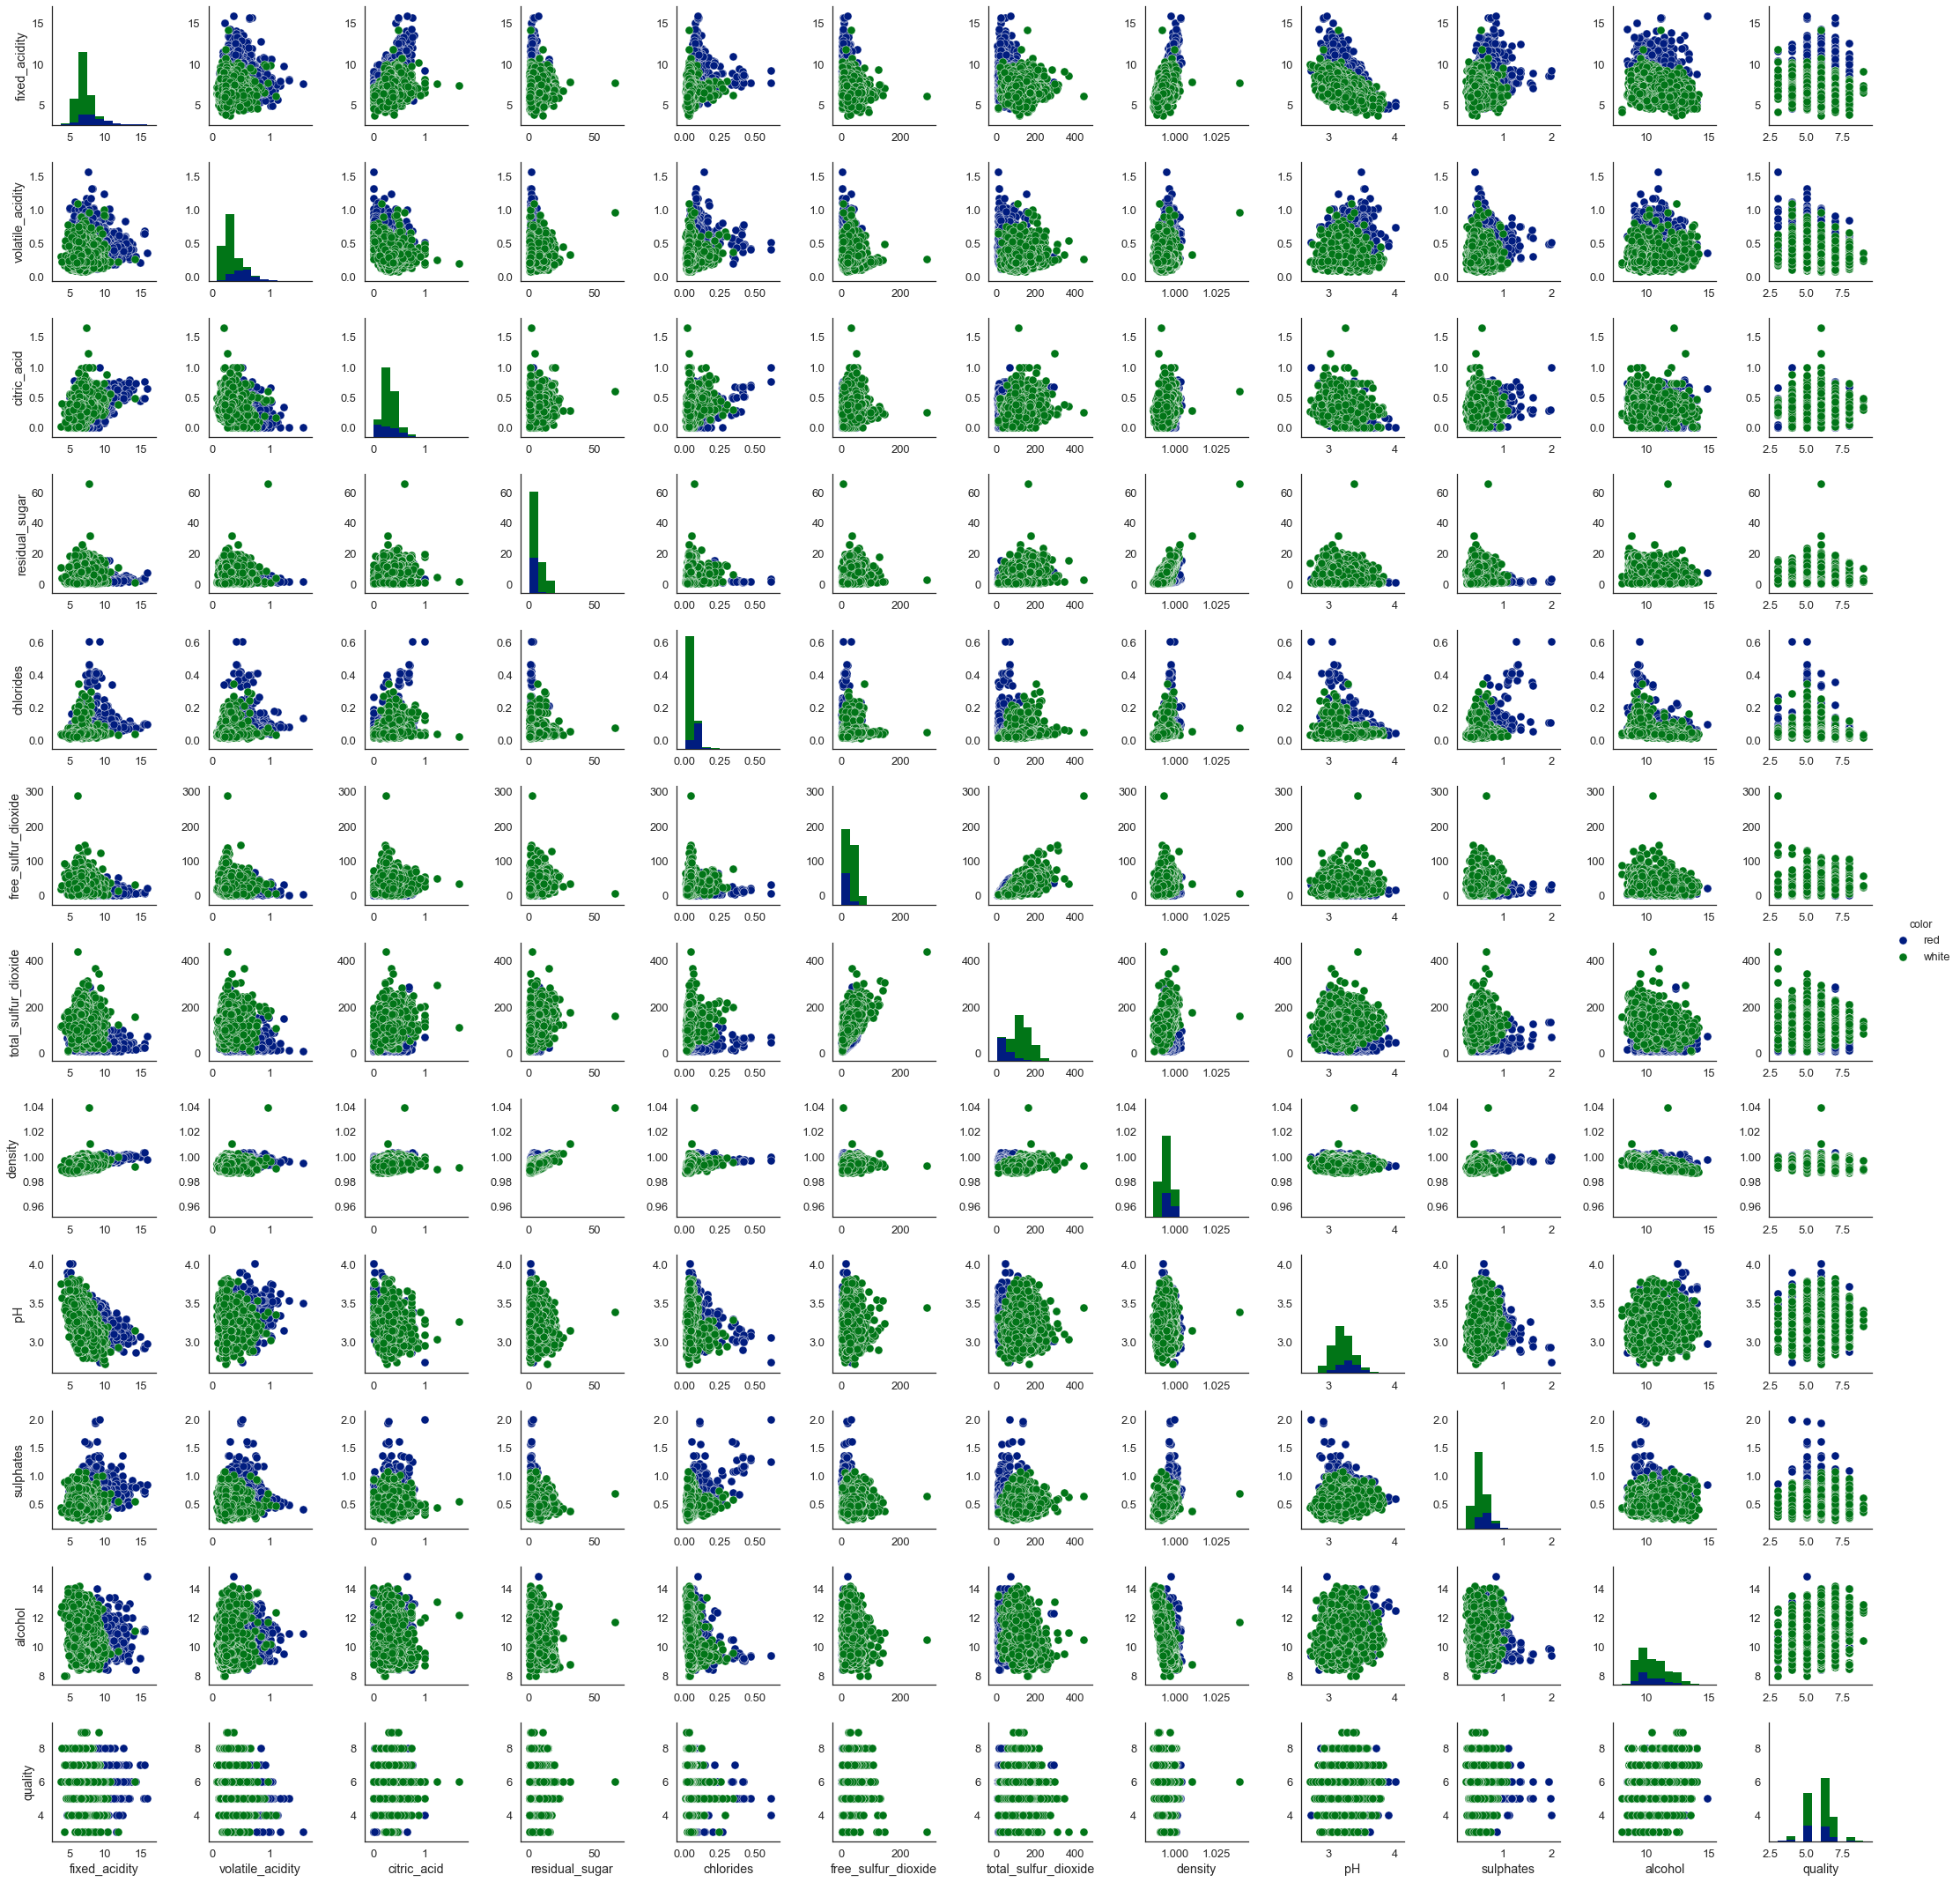

In [6]:
sns.pairplot(wine_data,hue='color')
plt.show()

[(-1, 1), Text(0,0.5,'Pearson correlation')]

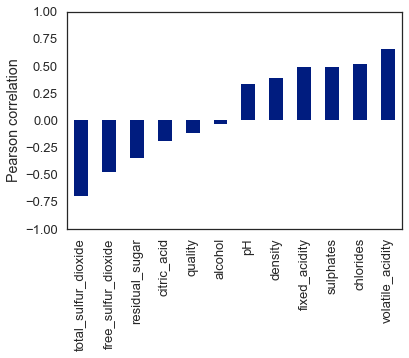

In [7]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1,1],ylabel='Pearson correlation')

In [8]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index
X = wine_data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns = ['%s_scaled'%field for field in fields])
X.columns

Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')

## Question 2

The goal for this question is to look at the decision boundary of a LinearSVC classifier on this dataset.

* Fit a Linear Support Vector Machine Classifier to `X`, `y`.
* Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
* Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
* Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
* Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
```

Feel free to experiment with different parameter choices for LinearSVC and see the decision boundary.

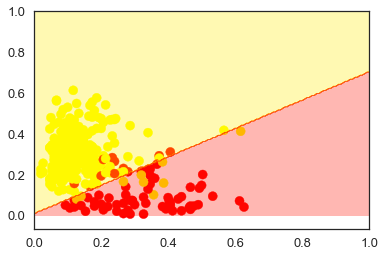

In [9]:
%matplotlib inline

from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X,y)

X_color = X.sample(300,random_state = 42)
Y_color = y.loc[X_color.index]
Y_color = Y_color.map(lambda col :'red' if col==1 else 'yellow')
ax=plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=Y_color, alpha=1)

xx_axis , yy_axis = np.meshgrid(np.arange(0,1.005,.005),np.arange(0,1.005,.005))

xx = xx_axis.ravel()
yy = yy_axis.ravel()

X_grid = pd.DataFrame([xx,yy]).T
Y_grid = lsvc.predict(X_grid)
Y_grid_predictions = Y_grid.reshape(xx_axis.shape)

plt.contourf(xx_axis,yy_axis,Y_grid_predictions,cmap=plt.cm.autumn_r,alpha=.3)

## Question 3

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> fit model
     <li> get sample 300 records from X and the corresponding y's
     <li> create grid, predict, plot using ax.contourf
     <li> add on the scatter plot
    </ol>
* After copying and pasting code, make sure the finished function uses your input `estimator` and not the LinearSVC model you built.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, for various values of `C`, plot the decision boundary. You may try  
`Cs = [.1, 1, 10]`

In [10]:
def plot_decesion_boundary(estinmator,X,y):
        
    estinmator.fit(X,y)

    X_color = X.sample(300,random_state = 42)
    Y_color = y.loc[X_color.index]
    Y_color = Y_color.map(lambda col :'red' if col==1 else 'yellow')
#     ax=plt.axes()
#     ax.scatter(
#         X_color.iloc[:, 0], X_color.iloc[:, 1],
#         color=Y_color, alpha=1)

    xx_axis , yy_axis = np.meshgrid(np.arange(0,1.005,.005),np.arange(0,1.005,.005))

    xx = xx_axis.ravel()
    yy = yy_axis.ravel()

    X_grid = pd.DataFrame([xx,yy]).T
    Y_grid = lsvc.predict(X_grid)
    Y_grid_predictions = Y_grid.reshape(xx_axis.shape)
    
    fig,ax = plt.subplots(figsize=(10,10))
    
    ax.contourf(xx_axis,yy_axis,Y_grid_predictions,cmap=plt.cm.autumn_r,alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=Y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title='Decesion boundary plot')
    


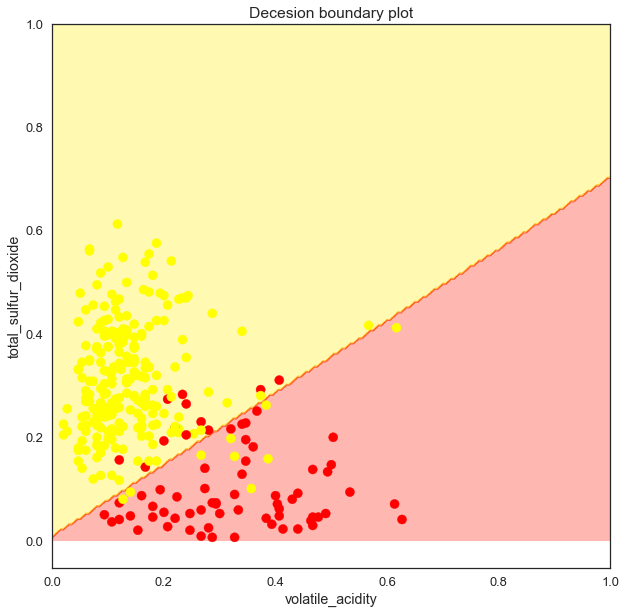

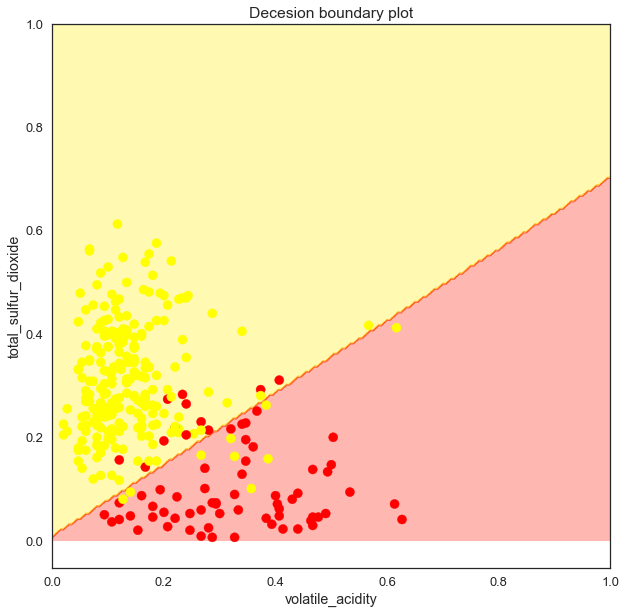

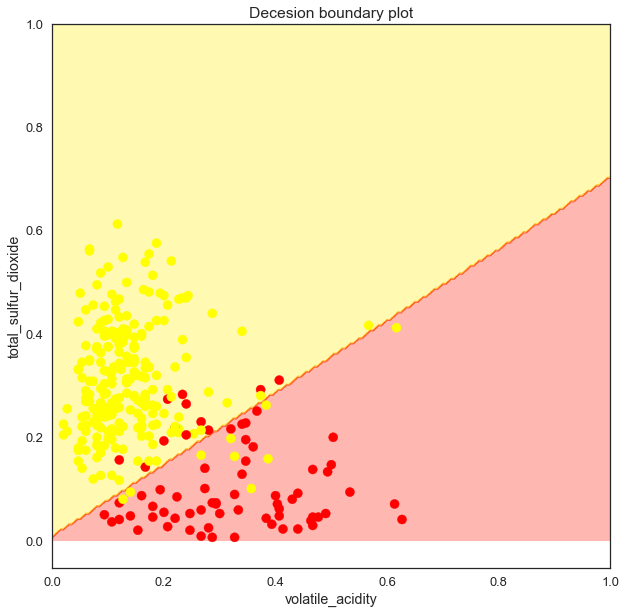

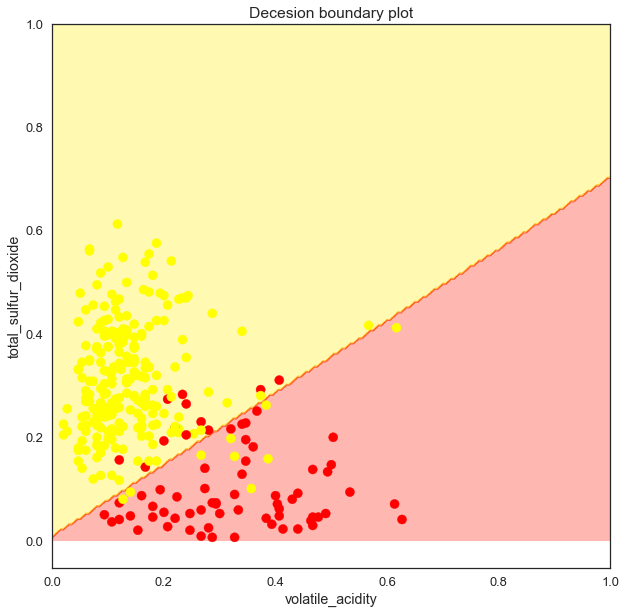

In [11]:
%matplotlib inline
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decesion_boundary(SVC_Gaussian, X, y)

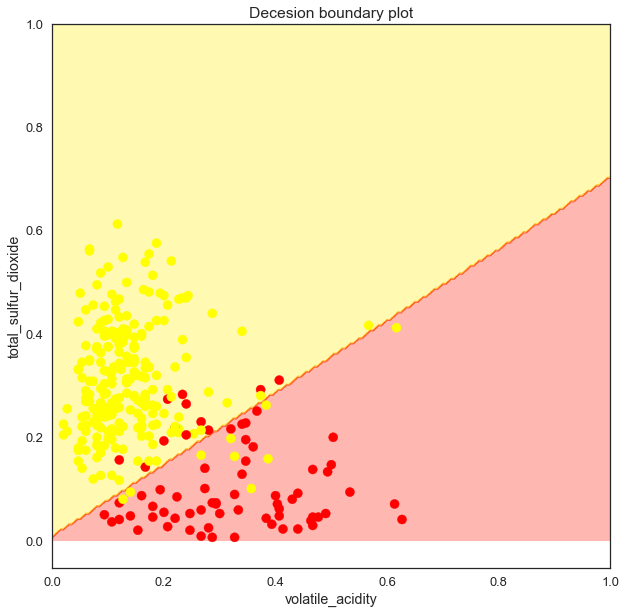

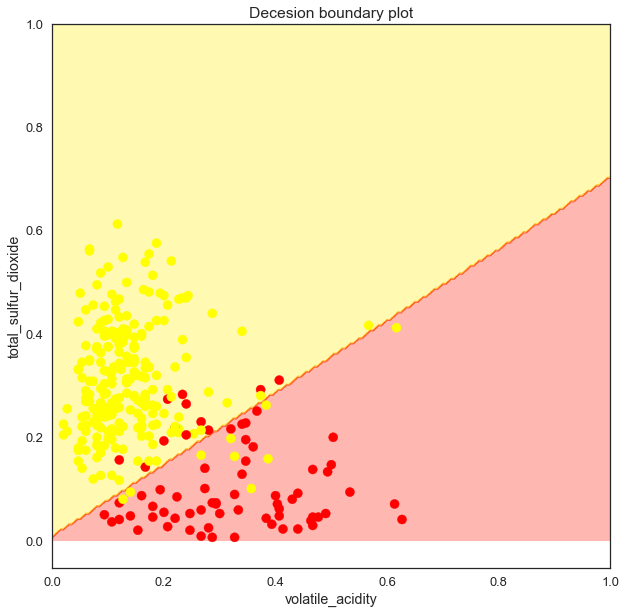

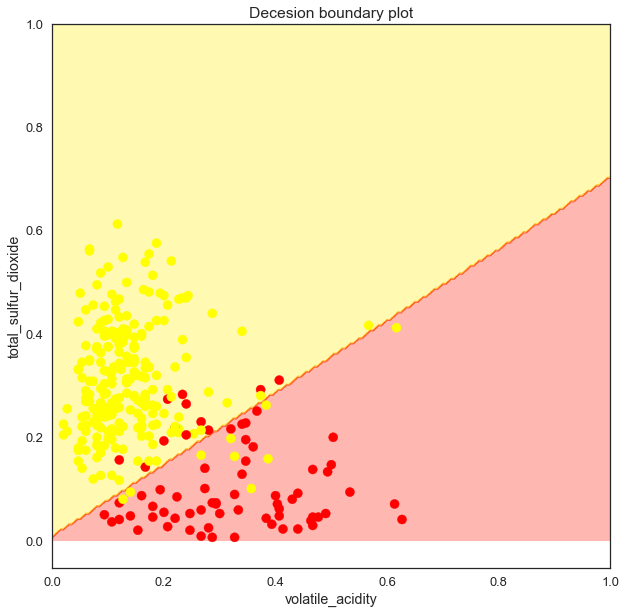

In [12]:
Cs = [.1, 1, 10]
for c in Cs:
    svc_gaussian = SVC(kernel='rbf', gamma=2,C=c)
    plot_decesion_boundary(svc_gaussian,X,y)
    

## Question 3A

Let's now fit a Polynomial kernel SVC with degree 3 and see how the decision boundary changes.

* Use the plot decision boundary function from the previous question and try the Polynomial Kernel SVC
* For various values of `C`, plot the decision boundary. You may try  
`Cs = [10,20,100,200]`
* Try to find out a C value that gives the best possible decision boundary

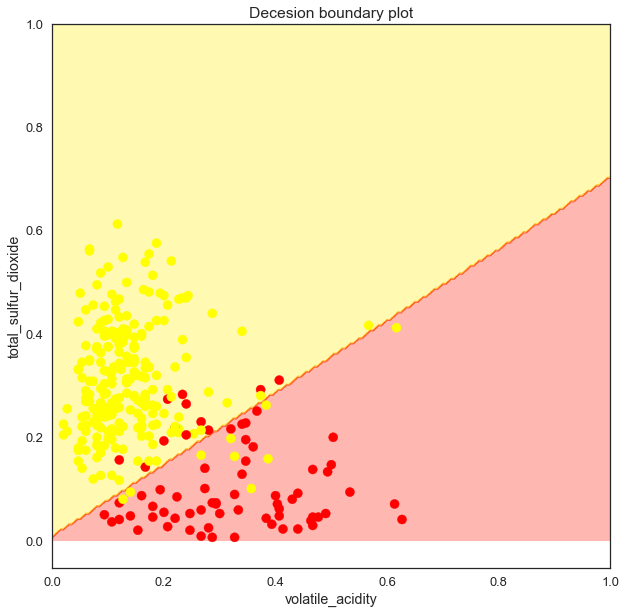

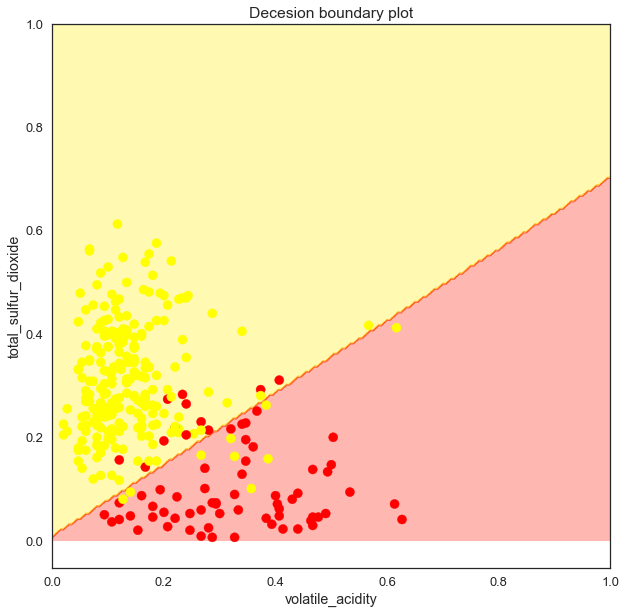

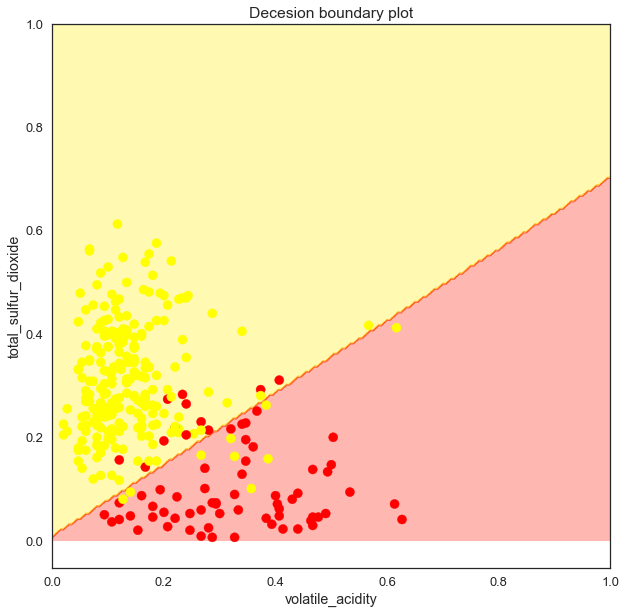

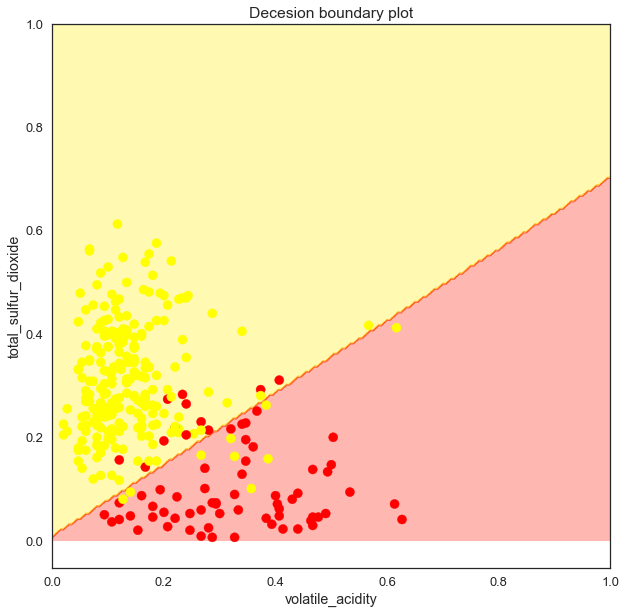

In [13]:

Cs = [10,20,100,200]
for c in Cs:
    SVC_poly = SVC(kernel='poly',degree=3, gamma=2,C=c)
    plot_decesion_boundary(SVC_poly, X, y)

## Question 4

In this question, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If you type **`%%timeit`** in the beginning of the cell, then it will run the whole cell and output the running time.

* Re-load the wine quality data if you made changes to the original.
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much shorter to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above

In [14]:
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

kwargs = {'kernel':'rbf'}

svc = SVC()
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()


In [15]:
%%timeit
import warnings
warnings.filterwarnings('ignore')
svc.fit(X,y)


357 ms ± 6.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
x_transformed = nystroem.fit_transform(X)
sgd.fit(x_transformed,y)

43.1 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
X_new = pd.concat([X]*5)
Y_new = pd.concat([y]*5)

In [18]:
print(X.shape)
print(X_new.shape)

(6497, 2)
(32485, 2)


In [19]:
%%timeit
svc.fit(X_new,Y_new)

8.55 s ± 32.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
x_transformed = nystroem.fit_transform(X_new)
sgd.fit(x_transformed,Y_new)

224 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Question 5
Try Tuning hyper-parameters for the svm kernal using GridSearchCV

* Take the complete dataset
* Do a test and train split
* Set parameters for cross validation. Do this for as many values of gamma and C
* Using gridsearchcv to run through the data using the various parameters values
* Get the mean and standard deviation on the set for the various combination of gamma and C values
* print the best parameters in the training set

In [21]:
import numpy as np
y = (wine_data['color'] == 'red').astype(int)
fields = list(wine_data.columns[:-1])
X = wine_data[fields]

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.3,random_state = 42)
parameters = {'kernel':['rbf','poly','linear'],'C':[.1,.5,.8,1,4,6,8,20] }
svc = SVC()
gridcv = GridSearchCV(svc,parameters)
gridcv.fit(X_train,Y_train)